In [90]:
import pandas_datareader as pdr 
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error,mean_absolute_error
plt.style.use('fivethirtyeight')#for plots 
import os 
import warnings
warnings.filterwarnings('ignore')

In [91]:
# train=pdr.
traindata = pd.read_csv(r"D:\amit\storesales\train.csv")
testdata = pd.read_csv(r"D:\amit\storesales\train.csv")
holidaysdata=pd.read_csv("D:/amit/storesales/holidays_events.csv")
storesdata = pd .read_csv(r"D:\amit\storesales\stores.csv")
# oildata = pd.read_csv("D:\\amit\\storesales\\oil.csv")
# transactiondata = pd.read_csv(r"D:\amit\storesales\transactions.csv")

# sample_sdata = pd . read_csv(r"D:\amit\storesales\sample_submission.csv")

In [92]:
traindata.head(100)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
...,...,...,...,...,...,...
95,95,2013-01-01,11,PREPARED FOODS,0.0,0
96,96,2013-01-01,11,PRODUCE,0.0,0
97,97,2013-01-01,11,SCHOOL AND OFFICE SUPPLIES,0.0,0
98,98,2013-01-01,11,SEAFOOD,0.0,0


In [93]:
traindata.tail()

,id,date,store_nbr,family,sales,onpromotion
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0


This plot shows how **total daily sales** changed over time in the dataset.

- **X-axis**: Time (each point is a specific date)
- **Y-axis**: Total sales for that day

### 📌 What This Means:
- This chart gives us a clear view of **sales trends**—whether revenue is increasing, decreasing, or staying stable.
- **Spikes** in the graph may indicate promotions, holidays, or events that led to more purchases.
- **Dips** might signal low-traffic days, stock issues, or other disruptions.


<Axes: >

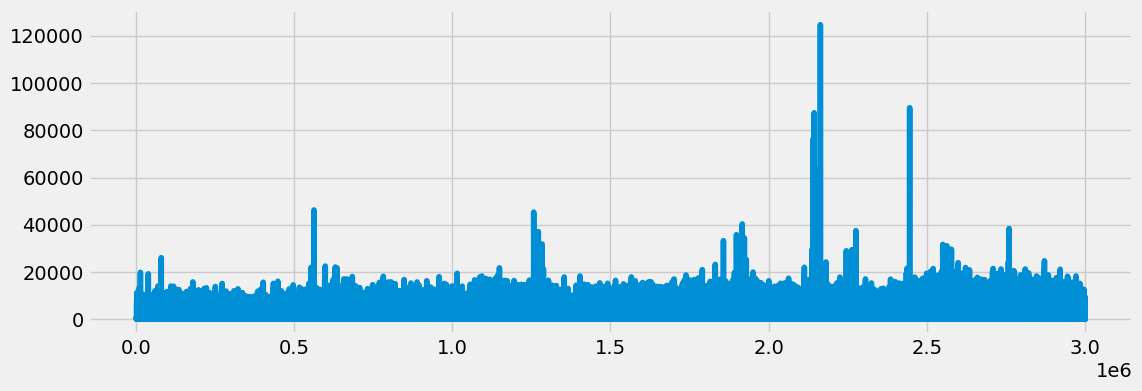

In [94]:
traindata["sales"].plot(figsize=(12,4))

<Axes: >

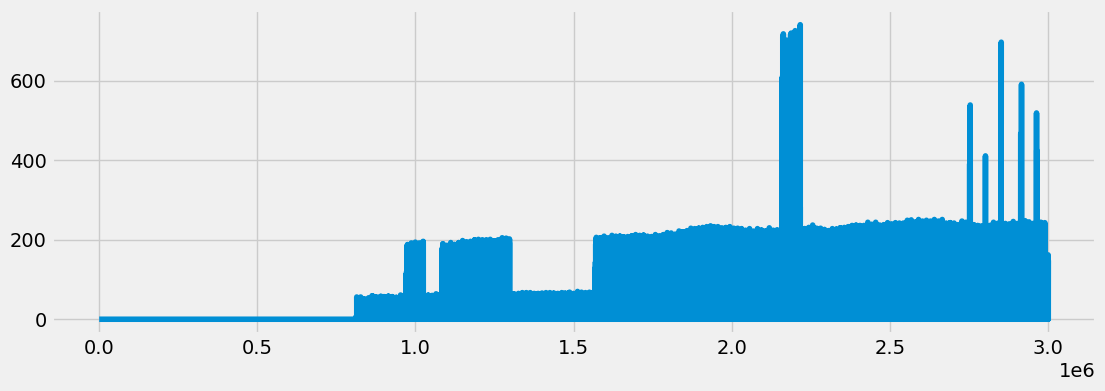

In [95]:
# onpromotion gives the total number of items in a product family that were being promoted at a store at a given date.
traindata["onpromotion"].plot(figsize=(12,4))

In [98]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [99]:
traindata.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [100]:
storesdata.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [101]:
# oildata.isna().sum()
# oildata.head()
# Why didn't we delete the nulls in oil.csv?
# 🧠 1. Time Series Continuity Is Crucial


# 📈 2. Oil Prices Don’t Change Drastically Day to Day


# 🔍 3. Missing Values Often Occur on Weekends or Holidays


# ✅ So, ffill = Best of Both Worlds:
# oildata['dcoilwtico'] = oildata['dcoilwtico'].fillna(method='ffill')
# oildata['dcoilwtico'] = oildata['dcoilwtico'].fillna(method='ffill').fillna(method='bfill')#cause of first row is NAN
# oildata.isna().sum()

In [102]:
holidaysdata.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

MERGING DATA 

In [103]:

# # --- 3. Merge train data with oil prices on date ---
# merged = pd.merge(traindata, oildata, how='left', on='date')

# --- 4. Merge with store information on store_nbr ---
merged = pd.merge(traindata, storesdata, how='left', on='store_nbr')

In [104]:
merged.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13


✅ Why this is useful:
Adding is_holiday helps your model capture dips/spikes in sales due to holidays — especially for products that are sensitive to seasonality or special events.

In [105]:
national_holidays = holidaysdata[holidaysdata['locale'] == 'National'][['date']]


In [106]:
national_holidays['is_holiday'] = 1
merged = pd.merge(merged, national_holidays, how='left', on='date')


In [107]:
merged.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,is_holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,1.0
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,1.0
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,1.0
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,1.0
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,1.0


In [108]:
merged['is_holiday'] = merged['is_holiday'].fillna(0)

In [109]:
# transactiondata.head()

In [110]:
merged.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,is_holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,1.0
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,1.0
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,1.0
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,1.0
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,1.0


a333333333333333333333333333333 dono't know how to deal with the transaction and samplesubmission ):
WE WOULDN'T NEED IT 

In [111]:
print(traindata.duplicated().sum())
# print(oildata.duplicated().sum())
print(holidaysdata.duplicated().sum())
print(storesdata.duplicated().sum())
# print(transactiondata.duplicated().sum())
print(merged.duplicated().sum())

0
0
0
7128


In [112]:
# merged[merged.duplicated().all(axis=0)]
duplicates = merged[merged.duplicated()]
duplicates

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,is_holiday
1286605,1286604,2014-12-26,1,AUTOMOTIVE,1.00000,0,Quito,Pichincha,D,13,1.0
1286607,1286605,2014-12-26,1,BABY CARE,0.00000,0,Quito,Pichincha,D,13,1.0
1286609,1286606,2014-12-26,1,BEAUTY,3.00000,0,Quito,Pichincha,D,13,1.0
1286611,1286607,2014-12-26,1,BEVERAGES,1764.00000,4,Quito,Pichincha,D,13,1.0
1286613,1286608,2014-12-26,1,BOOKS,0.00000,0,Quito,Pichincha,D,13,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2182941,2175817,2016-05-08,9,POULTRY,590.37103,0,Quito,Pichincha,B,6,1.0
2182943,2175818,2016-05-08,9,PREPARED FOODS,110.06000,0,Quito,Pichincha,B,6,1.0
2182945,2175819,2016-05-08,9,PRODUCE,1782.35200,1,Quito,Pichincha,B,6,1.0
2182947,2175820,2016-05-08,9,SCHOOL AND OFFICE SUPPLIES,7.00000,0,Quito,Pichincha,B,6,1.0


there is no dublicate in merged or any data 

CAN'T TO MERGE TRANSACTION SO WE CAN'T USE OIL WITH THE DATA 

In [113]:
# print(merged[['store_nbr', 'date']].duplicated().sum())
# print(transactiondata[['store_nbr', 'date']].duplicated().sum())
# merged[['store_nbr', 'date']].duplicated()

# merged = pd.merge(merged, transactiondata, how='left', on='store_nbr')

now i have merged  train , holidays,stores 

In [114]:
# Convert date to datetime
merged['date'] = pd.to_datetime(merged['date'])

In [115]:
merged.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008016 entries, 0 to 3008015
Data columns (total 11 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   city         object        
 7   state        object        
 8   type         object        
 9   cluster      int64         
 10  is_holiday   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 252.4+ MB


In [116]:
print(merged.describe())  # Summary stats for numerical columns


                 id                           date     store_nbr  \
count  3.008016e+06                        3008016  3.008016e+06   
mean   1.501508e+06  2015-04-24 22:50:02.843602688  2.750000e+01   
min    0.000000e+00            2013-01-01 00:00:00  1.000000e+00   
25%    7.520038e+05            2014-02-27 18:00:00  1.400000e+01   
50%    1.502226e+06            2015-04-25 12:00:00  2.750000e+01   
75%    2.248883e+06            2016-06-18 06:00:00  4.100000e+01   
max    3.000887e+06            2017-08-15 00:00:00  5.400000e+01   
std    8.657303e+05                            NaN  1.558579e+01   

              sales   onpromotion       cluster    is_holiday  
count  3.008016e+06  3.008016e+06  3.008016e+06  3.008016e+06  
mean   3.582691e+02  2.609620e+00  8.481481e+00  8.708531e-02  
min    0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  4.000000e+00  0.000000e+00  
50%    1.100000e+01  0.000000e+00  8.500000e+00  0.000000e+00  
75%

In [117]:
merged['sales'].value_counts()

sales
0.000        940483
1.000        115556
2.000         86171
3.000         68734
4.000         57965
              ...  
1061.655          1
15608.000         1
1765.819          1
801.774           1
2419.729          1
Name: count, Length: 379610, dtype: int64

...>0.000        940483 " 0$ " /
1.000        115556  "1$ "
SALES IS MONEY WHAT I GAIN 
              ...  
1061.655          1 
15608.000         1


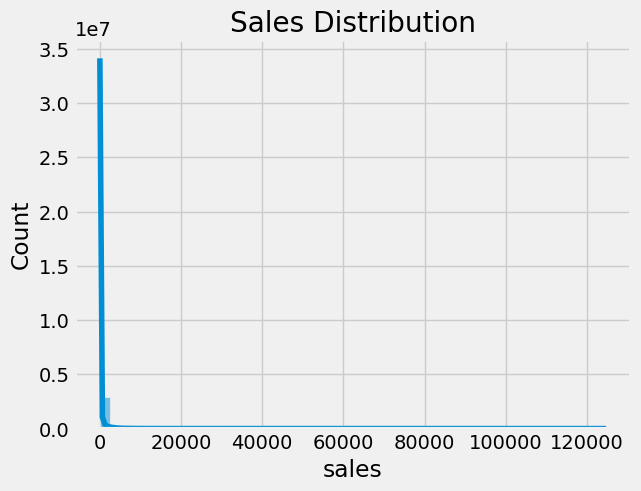

In [118]:
sns.histplot(merged['sales'], bins=50, kde=True,)
plt.title('Sales Distribution')
plt.show()

COUSE OF THIS GRAPH  THE MOST VALUE WE GAINED IS 0$

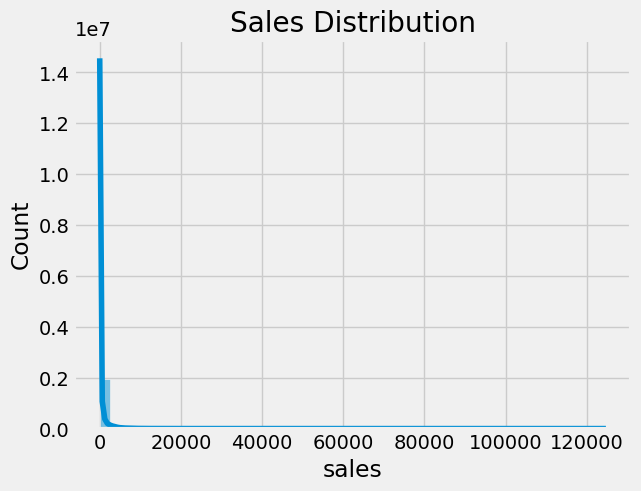

In [119]:
sns.histplot(merged[merged['sales'] != 0]['sales'], bins=50, kde=True,)
plt.title('Sales Distribution')
plt.show()

📌 Why? Time series plot to detect seasonality, trends, or spikes.



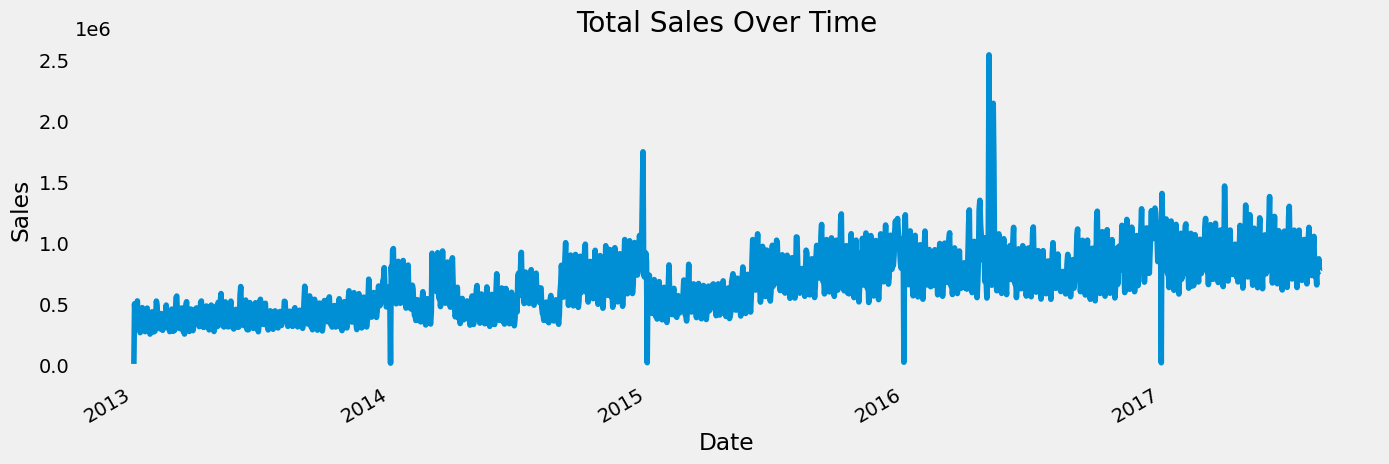

In [120]:
daily_sales = merged.groupby('date')['sales'].sum()
daily_sales.plot(figsize=(15,5), title='Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid()
plt.show()

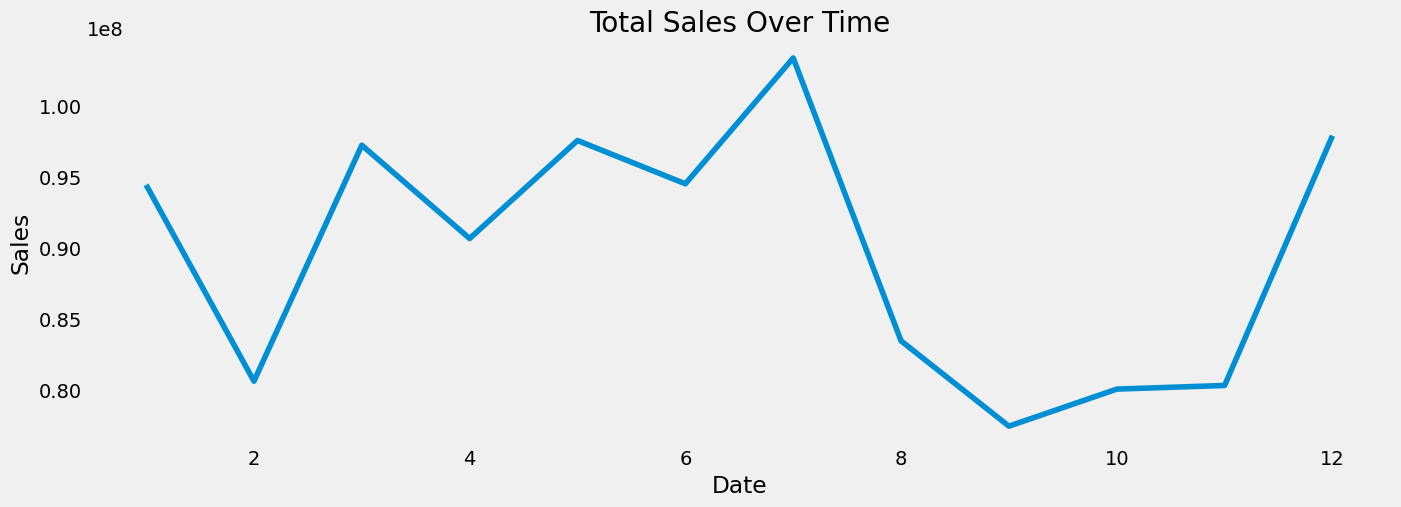

In [147]:
daily_sales = merged.groupby('month')['sales'].sum()
daily_sales.plot(figsize=(15,5), title='Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid()
plt.show()

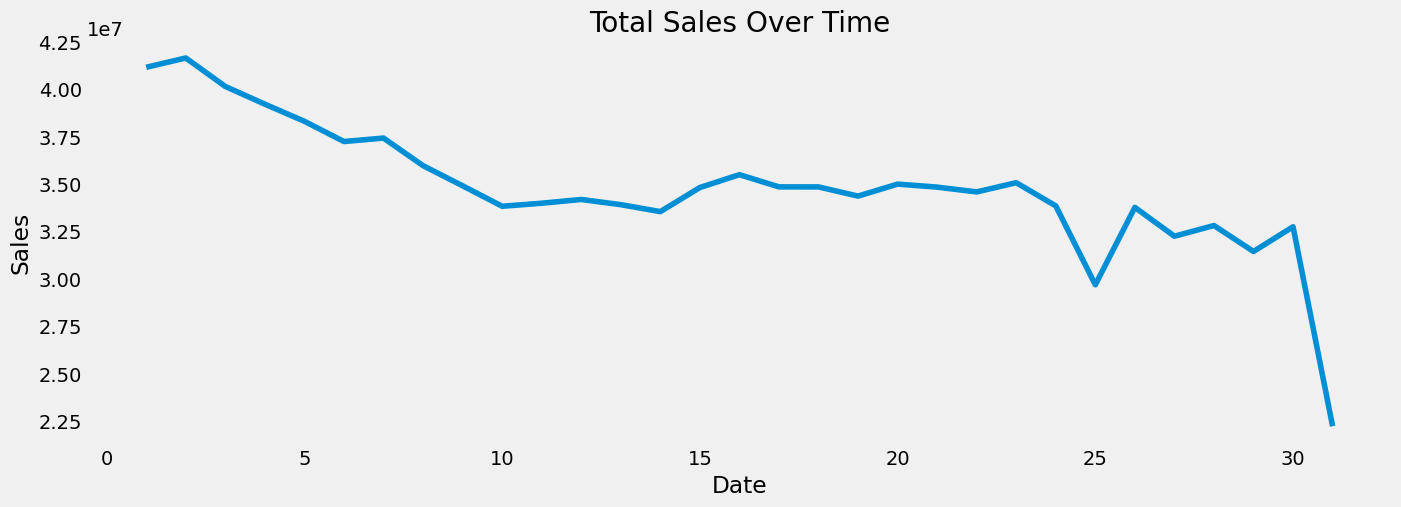

In [148]:
daily_sales = merged.groupby('day')['sales'].sum()
daily_sales.plot(figsize=(15,5), title='Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid()
plt.show()

NUMBER OF TIMES WHEN WE GAINED 0$

In [121]:
merged[merged['sales'] == 0]['date'].value_counts()

date
2013-01-01    1765
2015-01-01    1759
2017-01-01    1754
2016-01-01    1753
2014-01-01    1732
              ... 
2017-05-13     201
2017-04-30     199
2017-05-07     199
2017-05-01     195
2017-05-06     194
Name: count, Length: 1684, dtype: int64

WHEN THE STORE IS CLOSED COUSE IT'S HOLIDAY

In [122]:
merged[(merged['sales'] == 0) & (merged['is_holiday'] == True)]['date'].value_counts()


date
2013-01-01    1765
2015-01-01    1759
2017-01-01    1754
2016-01-01    1753
2014-01-01    1732
              ... 
2017-01-02     242
2017-05-14     226
2017-05-26     216
2017-05-13     201
2017-05-01     195
Name: count, Length: 143, dtype: int64

📌 Why? Understand seasonality and which months tend to perform better.

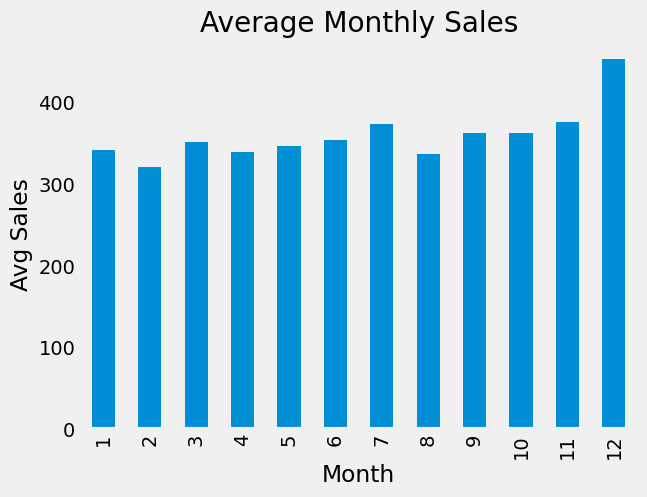

In [123]:
merged['month'] = merged['date'].dt.month
monthly_avg = merged.groupby('month')['sales'].mean()
monthly_avg.plot(kind='bar', title='Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Avg Sales')
plt.grid()
plt.show()

📌 Why? Identify which product categories sell more or are more variable.

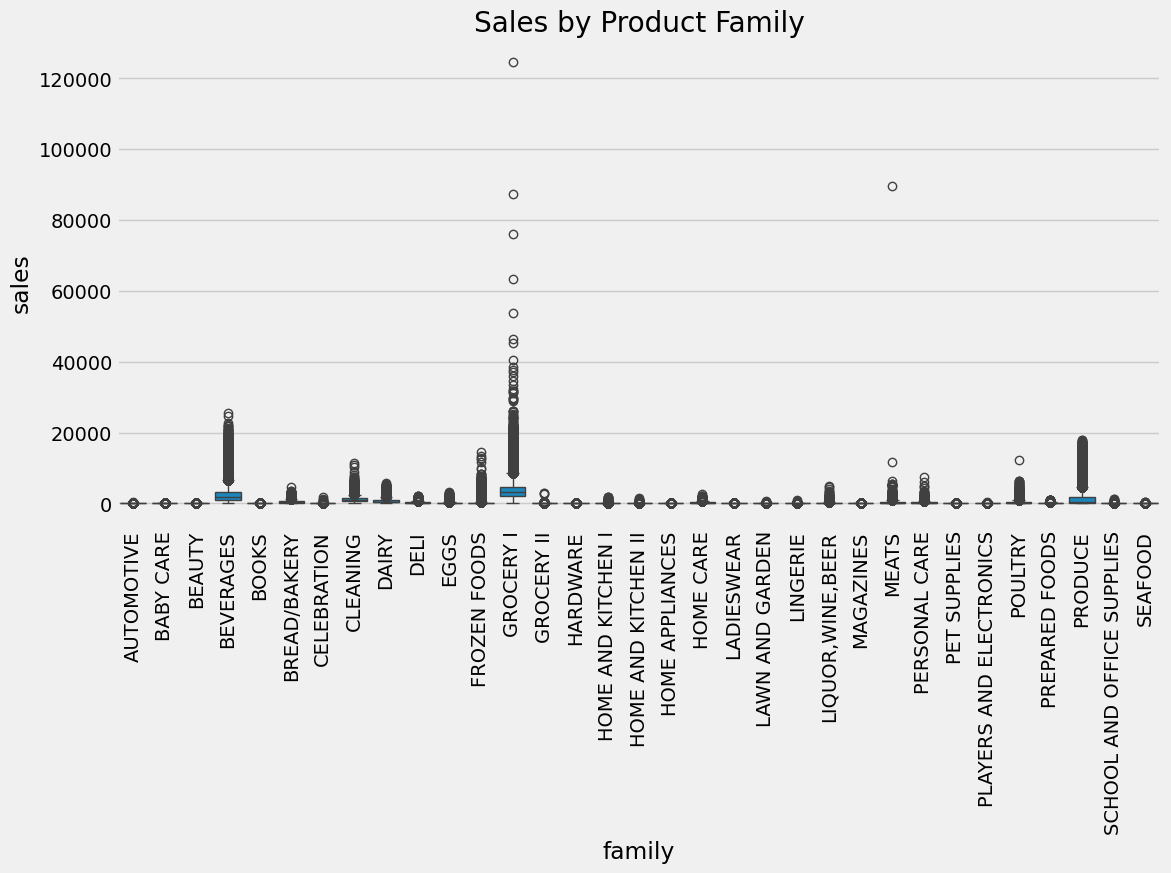

In [124]:
plt.figure(figsize=(12,6))
sns.boxplot(x='family', y='sales', data=merged)
plt.xticks(rotation=90)
plt.title('Sales by Product Family')
plt.show()

In [125]:
merged[merged['family'] == "AUTOMOTIVE"]['sales']

0           0.0
33          0.0
66          0.0
99          0.0
132         0.0
           ... 
3007851     8.0
3007884     7.0
3007917     5.0
3007950     4.0
3007983    15.0
Name: sales, Length: 91152, dtype: float64

In [126]:
merged.groupby(['family'])['sales'].sum().sort_values(ascending=False)

family
GROCERY I                     3.446627e+08
BEVERAGES                     2.178541e+08
PRODUCE                       1.232645e+08
CLEANING                      9.784614e+07
DAIRY                         6.473015e+07
BREAD/BAKERY                  4.227404e+07
POULTRY                       3.198177e+07
MEATS                         3.117550e+07
PERSONAL CARE                 2.468827e+07
DELI                          2.419297e+07
HOME CARE                     1.610466e+07
EGGS                          1.563770e+07
FROZEN FOODS                  1.412904e+07
PREPARED FOODS                8.826567e+06
LIQUOR,WINE,BEER              7.772524e+06
SEAFOOD                       2.021558e+06
GROCERY II                    1.969972e+06
HOME AND KITCHEN I            1.870072e+06
HOME AND KITCHEN II           1.527818e+06
CELEBRATION                   7.643310e+05
LADIESWEAR                    6.554130e+05
LINGERIE                      6.549090e+05
PLAYERS AND ELECTRONICS       5.660260e+05
AUTO

Why Remove Outliers?


# DON'T NEED TO REMOVE OUTLIYER COUSE IT MEAN THE PRODUCT IS EXPENSIVE ONLY 

In [127]:

# Q1 = merged['sales'].quantile(0.25)
# Q3 = merged['sales'].quantile(0.75)
# IQR = Q3 - Q1

# # Detect outliers
# outliers = merged[(merged['sales'] < (Q1 - 1.5 * IQR)) | (merged['sales'] > (Q3 + 1.5 * IQR))]
# print("Outliers found:", len(outliers))

# # Remove them
# merged = merged[~((merged['sales'] < (Q1 - 1.5 * IQR)) | (merged['sales'] > (Q3 + 1.5 * IQR)))]

### EDA 
# UNI VARIANT ANALASYS
# categorical | discrete numerical (bar pie)
# numerical continues (histogram)
# bi variate numerical _numerical (scateer)
# numerical _catecorical ( [box plot] )
# categorical _categorical ( bar hue)

In [128]:
merged.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,is_holiday,month
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,1.0,1
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,1.0,1
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,1.0,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,1.0,1
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,1.0,1


Feature Engineering: remove don't needed columns

In [129]:
merged=merged.drop(columns=['cluster'])

In [130]:
merged['day'] = merged['date'].dt.day
# merged['week'] = merged['date'].dt.isocalendar().week
# merged['weekday'] = merged['date'].dt.weekday
merged['year'] = merged['date'].dt.year

In [131]:
merged.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,is_holiday,month,day,year
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,1.0,1,1,2013
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,1.0,1,1,2013
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,1.0,1,1,2013
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,1.0,1,1,2013
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,1.0,1,1,2013


In [132]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008016 entries, 0 to 3008015
Data columns (total 13 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   city         object        
 7   state        object        
 8   type         object        
 9   is_holiday   float64       
 10  month        int32         
 11  day          int32         
 12  year         int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(3), object(4)
memory usage: 263.9+ MB


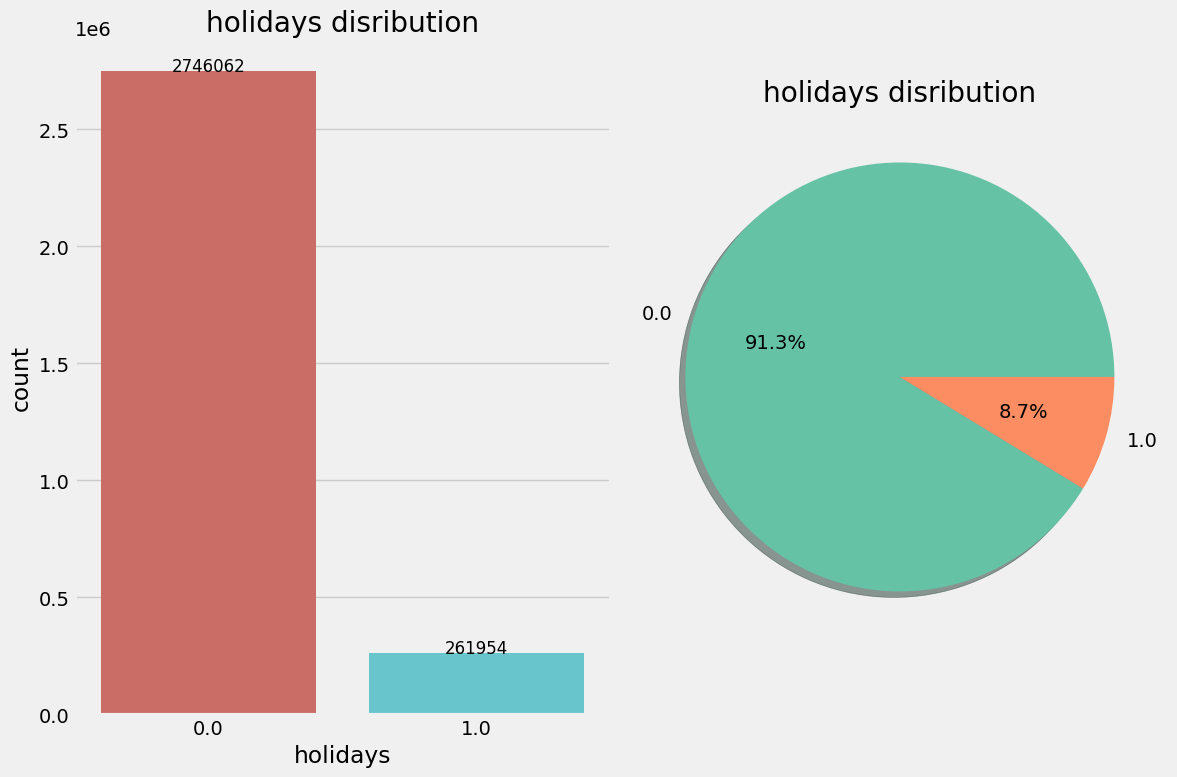

In [133]:
fig,axes=plt.subplots(1,2,figsize=(12,8))
 
geo_count=merged['is_holiday'].value_counts()

sns.barplot(x=geo_count.index,y=geo_count.values,palette='hls',ax=axes[0])
axes[0].set_title("holidays disribution")
axes[0].set_xlabel('holidays')
axes[0].set_ylabel('count')
# Correctly adding values on top of the bars
for i, value in enumerate(geo_count.values):
    axes[0].text(i, value + 5, str(value), ha='center', fontsize=12, color='black')


axes[1].pie(geo_count,labels=geo_count.index,autopct='%1.1f%%',colors=sns.color_palette("Set2"),shadow=True)
axes[1].set_title("holidays disribution")
plt.tight_layout()
plt.show()

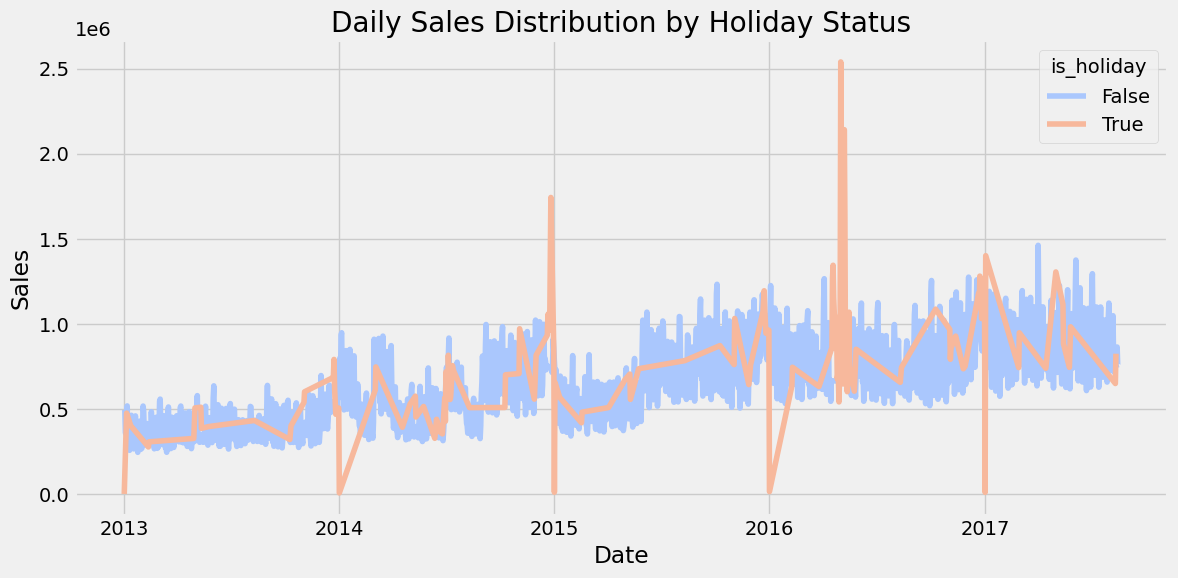

In [134]:
# Ensure 'is_holiday' is a boolean
merged['is_holiday'] = merged['is_holiday'].astype(bool)

# Aggregating sales data by time and holiday status (daily)
daily_sales = merged.groupby(['date', 'is_holiday']).agg({'sales': 'sum'}).reset_index()

# Plotting a single line plot for holiday vs non-holiday sales
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='date', y='sales', hue='is_holiday', palette='coolwarm')

# Customizing the plot
plt.title('Daily Sales Distribution by Holiday Status')
plt.xlabel('Date')
plt.ylabel('Sales')

# Display the plot
plt.tight_layout()
plt.show()

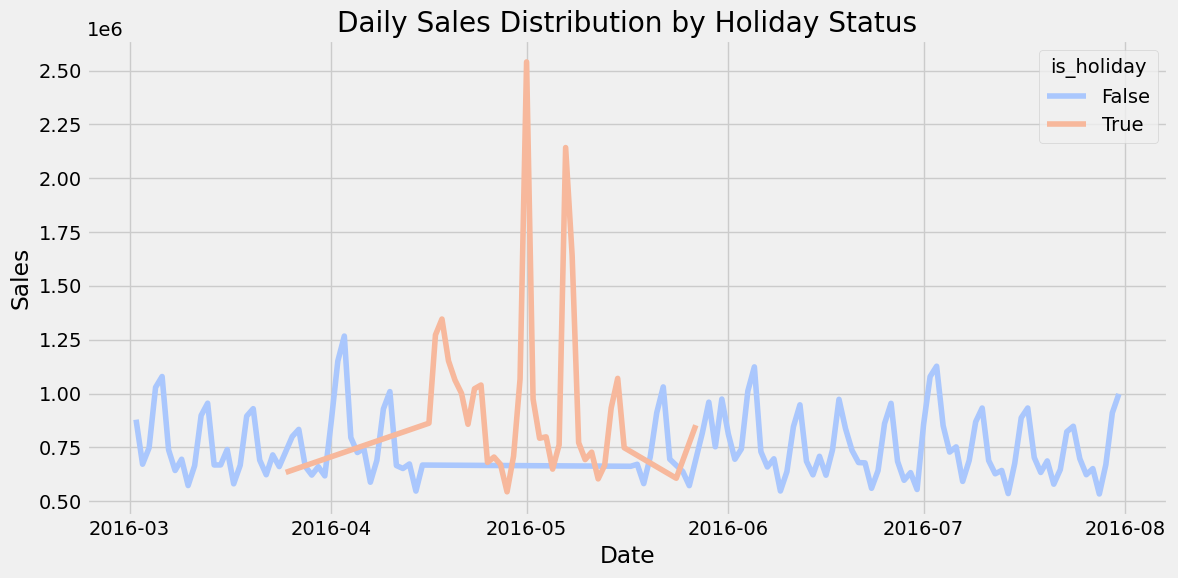

In [135]:
# Ensure 'is_holiday' is a boolean
merged['is_holiday'] = merged['is_holiday'].astype(bool)

# Aggregating sales data by time and holiday status (daily)
daily_sales = merged[(merged['date'] > "2016-03-01") & (merged['date'] < "2016-08-01")].groupby(['date', 'is_holiday']).agg({'sales': 'sum'}).reset_index()

# Plotting a single line plot for holiday vs non-holiday sales
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='date', y='sales', hue='is_holiday', palette='coolwarm')

# Customizing the plot
plt.title('Daily Sales Distribution by Holiday Status')
plt.xlabel('Date')
plt.ylabel('Sales')

# Display the plot
plt.tight_layout()
plt.show()

In [136]:
merged

,id,date,store_nbr,family,sales,onpromotion,city,state,type,is_holiday,month,day,year
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,True,1,1,2013
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,True,1,1,2013
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,True,1,1,2013
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,True,1,1,2013
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,True,1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008011,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,False,8,15,2017
3008012,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,False,8,15,2017
3008013,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,False,8,15,2017
3008014,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,False,8,15,2017


In [137]:
daily_sales = merged[(merged['date'] > "2016-03-01") & (merged['date'] < "2016-08-01") & (merged['is_holiday'] == True)].groupby(['date', 'city', 'state']).agg({'sales': 'sum'}).reset_index().sort_values(by='sales', ascending=False)
daily_sales

,date,city,state,sales
370,2016-05-01,Quito,Pichincha,1.383253e+06
502,2016-05-07,Quito,Pichincha,1.124058e+06
524,2016-05-08,Quito,Pichincha,8.124316e+05
62,2016-04-17,Quito,Pichincha,7.325722e+05
84,2016-04-18,Quito,Pichincha,7.049882e+05
...,...,...,...,...
724,2016-05-24,Salinas,Santa Elena,3.801368e+03
631,2016-05-13,Playas,Guayas,3.652568e+03
302,2016-04-28,Puyo,Pastaza,3.647044e+03
80,2016-04-18,Manta,Manabi,2.797280e+02


SO WE CAN SUMARIZE THAT CITY WHO CAUSE THE MOST GAIN FROM SALES IS IN QUITO IN STATE Pichincha

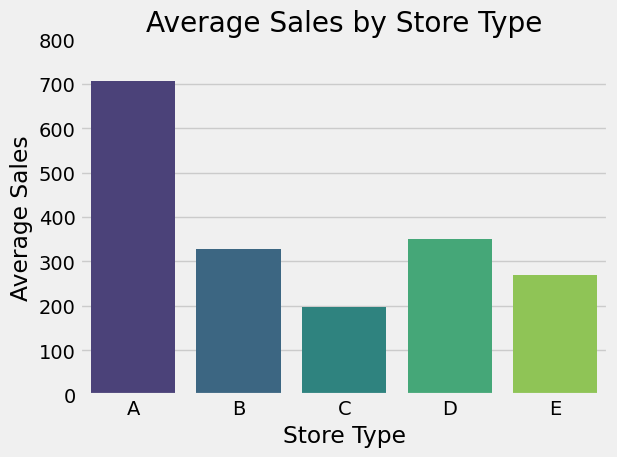

In [146]:
# Group by the correct column name
store_avg = merged.groupby('type')['sales'].mean().reset_index()

# Use the same column name in the plot
sns.barplot(data=store_avg, x='type', y='sales', palette='viridis')
plt.title('Average Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Sales')
plt.ylim(0, 800)
plt.tight_layout()
plt.show()

A correlation analysis shows that `onpromotion` affects `sales` by approximately **43%**, indicating a **moderate positive relationship** between the two variables. This means:

- When promotions increase, sales tend to increase as well.
- Promotional strategies can significantly boost customer purchases.
- Understanding this relationship is crucial for demand forecasting and inventory planning.

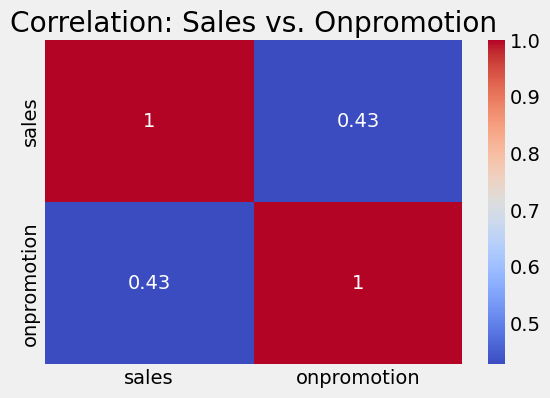

In [150]:
plt.figure(figsize=(6, 4))
sns.heatmap(merged[['sales', 'onpromotion']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation: Sales vs. Onpromotion")
plt.show()

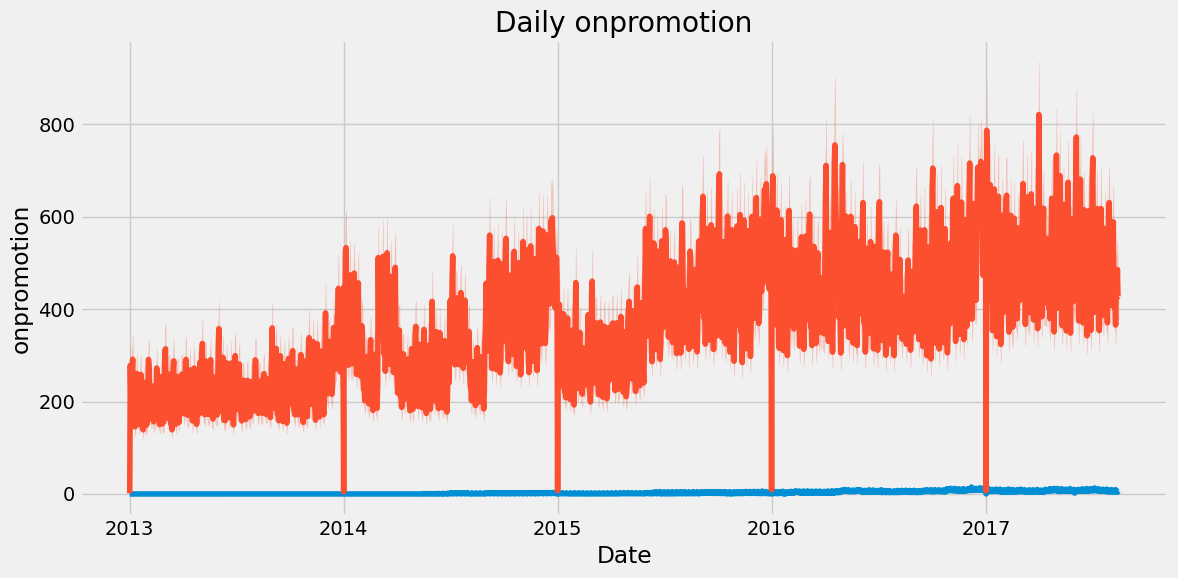

In [157]:


# Aggregating sales data by time and holiday status (daily)
# daily_sales = merged.groupby(['date', 'onpromotion']).agg({'sales': 'sum'}).reset_index()

# Plotting a single line plot for holiday vs non-holiday sales
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged, x='date', y='onpromotion', palette='coolwarm')
sns.lineplot(data=merged, x='date', y='sales', palette='coolwarm')


# Customizing the plot
plt.title('Daily onpromotion')
plt.xlabel('Date')
plt.ylabel('onpromotion')

# Display the plot
plt.tight_layout()
plt.show()

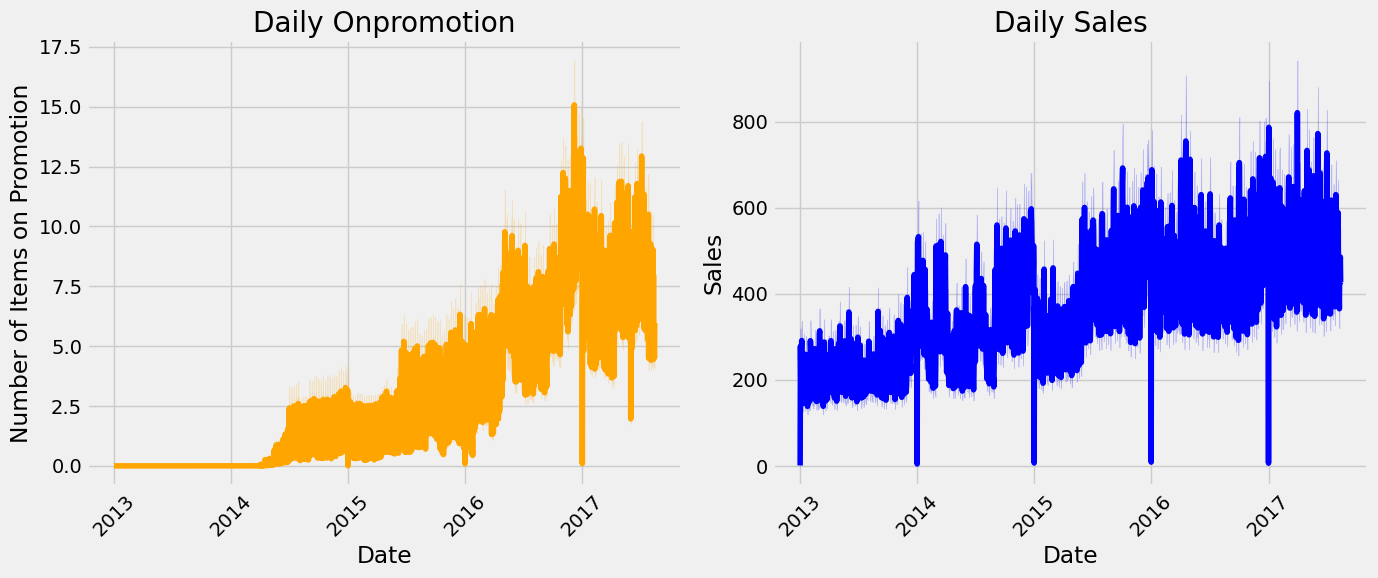

In [158]:

# Set figure size and style
plt.figure(figsize=(14, 6))

# Subplot 1: Onpromotion over time
plt.subplot(1, 2, 1)
sns.lineplot(data=merged, x='date', y='onpromotion', color='orange')
plt.title('Daily Onpromotion')
plt.xlabel('Date')
plt.ylabel('Number of Items on Promotion')
plt.xticks(rotation=45)

# Subplot 2: Sales over time
plt.subplot(1, 2, 2)
sns.lineplot(data=merged, x='date', y='sales', color='blue')
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)

# Layout adjustment
plt.tight_layout()
plt.show()

In [138]:
# # Convert 'date' to datetime format
# oildata['date'] = pd.to_datetime(oildata['date'])

# # Now you can safely extract parts of the date
# oildata['day'] = oildata['date'].dt.day
# oildata['month']=oildata['date'].dt.month
# oildata['year'] = oildata['date'].dt.year
# oildata=oildata.drop(columns=['date'])


# oildata

# oildata['dcoilwtico'].plot(kind='density', figsize=(10, 4))

In [139]:
# # Create subplots
# fig, axes = plt.subplots(3, 1, figsize=(10, 14), sharex=False)

# # Scatterplot for Year
# sns.scatterplot(x='dcoilwtico', y='year', data=oildata, ax=axes[0])
# axes[0].set_title('Oil Price (dcoilwtico) vs. Year')
# axes[0].set_xlabel('Oil Price')
# axes[0].set_ylabel('Year')

# # Scatterplot for Month
# sns.scatterplot(x='dcoilwtico', y='month', data=oildata, ax=axes[1])
# axes[1].set_title('Oil Price (dcoilwtico) vs. Month')
# axes[1].set_xlabel('Oil Price')
# axes[1].set_ylabel('Month')

# # Scatterplot for Day
# sns.scatterplot(x='dcoilwtico', y='day', data=oildata, ax=axes[2])
# axes[2].set_title('Oil Price (dcoilwtico) vs. Day')
# axes[2].set_xlabel('Oil Price')
# axes[2].set_ylabel('Day')

# # Adjust layout
# plt.tight_layout()
# plt.show()

In [140]:
# mergedwithoutdate=merged.drop(columns=['date'])

In [141]:
# mergedwithoutdate.info()

In [142]:
# # Count values per family
# family_counts = mergedwithoutdate['family'].value_counts()

# # Create bar plot
# ax = family_counts.plot(kind='bar', figsize=(12, 6))
# plt.title('Count of Entries per Product Family')
# plt.xlabel('Family')
# plt.ylabel('Count')
# plt.xticks(rotation=90)

# # Add count labels on top of each bar
# for i, count in enumerate(family_counts.values):
#     ax.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)

# plt.tight_layout()
# plt.show()

In [143]:
# mergedwithoutdate.groupby('family')['sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
# plt.title('Total Sales per Product Family')
# plt.xlabel('Family')
# plt.ylabel('Total Sales')
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(daily_sales, lags=40)
plt.show()
plot_pacf(daily_sales, lags=40)
plt.show()

In [ ]:
train_size = int(len(daily_sales) * 0.8)
train, test = daily_sales[:train_size], daily_sales[train_size:]

In [ ]:
print(model_fit.summary())

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_log_error
import matplotlib.pyplot as plt

# Assuming your data is already loaded as:
# X (features), y (target), with datetime index

# Split into train/test (last 30 days for validation)
y_train, y_valid = y.iloc[:-30], y.iloc[-30:]

# Fit ARIMA model (you may need to tune these parameters)
order = (5,1,0)  # Example order (p,d,q)
model = ARIMA(y_train, order=order)
model_fit = model.fit()

# Generate predictions
y_fit = model_fit.predict(start=y_train.index[0], end=y_train.index[-1], typ='levels').clip(0.0)
y_pred = model_fit.forecast(steps=len(y_valid)).clip(0.0)

# Calculate RMSLE
rmsle_train = mean_squared_log_error(y_train, y_fit) ** 0.5
rmsle_valid = mean_squared_log_error(y_valid, y_pred) ** 0.5
print(f'Training RMSLE: {rmsle_train:.5f}')
print(f'Validation RMSLE: {rmsle_valid:.5f}')

# Enhanced visualization
plt.figure(figsize=(14, 7))
plt.style.use('seaborn-v0_8-darkgrid')

# Plot actual values
y.plot(alpha=0.5, label='Actual Sales', color='#1f77b4', linewidth=1.5)

# Plot fitted values
y_fit.plot(label='Fitted', color='#2ca02c', linewidth=2)

# Plot forecast
y_pred.plot(label='Forecast', color='#ff7f0e', linewidth=2, linestyle='--')

# Add confidence intervals if available
try:
    conf_int = model_fit.get_forecast(steps=len(y_valid)).conf_int()
    plt.fill_between(y_valid.index,
                   conf_int.iloc[:, 0],
                   conf_int.iloc[:, 1],
                   color='#ff7f0e', alpha=0.1)
except:
    pass

# Customize plot
plt.title('ARIMA Model: Sales Forecasting', fontsize=16, pad=20, fontweight='bold')
plt.ylabel('Items Sold', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend(frameon=True, shadow=True, facecolor='white', edgecolor='gray', fontsize=11)

# Add RMSLE annotations
plt.annotate(f'Training RMSLE: {rmsle_train:.5f}\nValidation RMSLE: {rmsle_valid:.5f}',
             xy=(0.05, 0.05), xycoords='axes fraction',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
forecast = forecast.fillna(0)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'RMSE: {rmse}')